In [1]:
# Import pandas library

import pandas as pd

In [2]:
# Read csv data file

df = pd.read_csv('data/titanic.csv')

In [3]:
# View the number of rows and columns

df.shape

(887, 8)

In [4]:
# View the first 5 rows

df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
# Rename all columns
df.columns = ['survived', 'pclass', 'name', 'sex', 'age', 'sibspouse', 'parchild', 'fare']

# View column names
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibspouse', 'parchild',
       'fare'],
      dtype='object')

In [6]:
# Drop attribute Name
# Setting axis=1 means we want to drop a column

df = df.drop('name', axis = 1)
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibspouse', 'parchild', 'fare'], dtype='object')

In [7]:
df.head()

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
# View the data type of each attribute

df.dtypes

survived       int64
pclass         int64
sex           object
age          float64
sibspouse      int64
parchild       int64
fare         float64
dtype: object

In [9]:
# Convert integer to string: survived

df['survived'] = df['survived'].astype(str)
df['survived'].describe()

count     887
unique      2
top         0
freq      545
Name: survived, dtype: object

In [10]:
df['survived'].value_counts()

0    545
1    342
Name: survived, dtype: int64

In [11]:
# Convert integer to string: pclass
df['pclass'] = df['pclass'].astype(str)

# Convert integer to string: sex
df['sex'] = df['sex'].astype(str)

df.dtypes

survived      object
pclass        object
sex           object
age          float64
sibspouse      int64
parchild       int64
fare         float64
dtype: object

In [12]:
# Import LabelEncoder
from sklearn import preprocessing

# Create LabelEncoder
le = preprocessing.LabelEncoder()

# Convert string categories into numbers for sex
df['sex'] = le.fit_transform(df['sex'])

df.head()

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [13]:
# Indicate the target column
target = df['survived']

# Indicate the columns that will serve as features
features = df.drop('survived', axis = 1)

In [14]:
# Split data into train, validation and test sets

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset into training + development set and test set
x, x_test, y, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)
                                        
# Split the dataset into training set and development set
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [15]:
# Training a KNN model

# Import k-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k = 1
knn = KNeighborsClassifier(n_neighbors = 1)

# Train the model using the training set
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# Predict the target for the development dataset

dev_predict = knn.predict(x_dev)
dev_predict

array(['0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1',
       '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1'],
      dtype=object)

In [17]:
# Evaluate the knn model on development set

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.6901408450704225


In [18]:
# Create a KNN classifier with k = 5
knn = KNeighborsClassifier(n_neighbors = 5)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development set
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.6830985915492958


In [19]:
# Initialize 2 empty lists (K and validation) to store the values of k and validation score
# Initialize 1 empty dictionary (scores) to store the k:validation_score (key:value) pairs
K = []
validation = []
scores = {}

# The for loop will test k values from 1 to 29
for k in range(1, 30):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    
    # Can also use the score() function to compute accuracy
    # Compute accuracy by applying the model on the development set
    validation_score = clf.score(x_dev, y_dev)
    
    # Adds a single item (k value) to the list
    K.append(k)
    
    validation.append(validation_score)
    
    # A dictionary holds key:value pairs
    # Store the validation score for each value of k (k is the key)
    scores[k] = [validation_score]
    
# Print the key:value pairs in scores
for keys, values in scores.items():
    print(keys, ':', values)

1 : [0.6901408450704225]
2 : [0.6549295774647887]
3 : [0.6830985915492958]
4 : [0.6690140845070423]
5 : [0.6830985915492958]
6 : [0.6619718309859155]
7 : [0.676056338028169]
8 : [0.647887323943662]
9 : [0.6619718309859155]
10 : [0.6619718309859155]
11 : [0.6830985915492958]
12 : [0.647887323943662]
13 : [0.6619718309859155]
14 : [0.6549295774647887]
15 : [0.6830985915492958]
16 : [0.6830985915492958]
17 : [0.676056338028169]
18 : [0.6830985915492958]
19 : [0.7253521126760564]
20 : [0.7464788732394366]
21 : [0.7253521126760564]
22 : [0.7323943661971831]
23 : [0.7394366197183099]
24 : [0.7394366197183099]
25 : [0.7464788732394366]
26 : [0.7464788732394366]
27 : [0.7605633802816901]
28 : [0.7816901408450704]
29 : [0.7746478873239436]


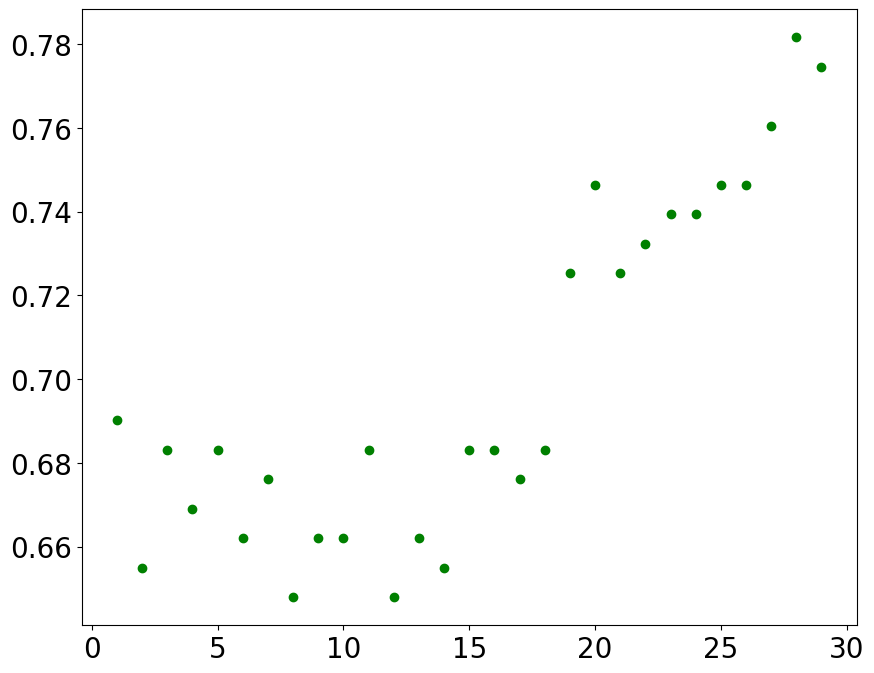

In [20]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

plt.scatter(K, validation, color ='g')
plt.show()

In [21]:
# Create a KNN classifier with k = 28 and manhattan_distance (p = 1)
knn = KNeighborsClassifier(n_neighbors = 28, p = 1)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development set
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.7676056338028169


In [22]:
# Create a KNN classifier with k = 28
knn = KNeighborsClassifier(n_neighbors = 28)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development dataset
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Dev): ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy (Dev):  0.7816901408450704


In [23]:
# Predict the target for the test dataset
test_predict = knn.predict(x_test)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

Accuracy (Test):  0.7247191011235955


In [24]:
features.head()

,pclass,sex,age,sibspouse,parchild,fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [25]:
from sklearn import preprocessing

names = features.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit the data on the Scaler object
scaled_features = scaler.fit_transform(features)

# After standardization, scaled_features is transformed into an array so we need to convert
scaled_features = pd.DataFrame(scaled_features, columns = names)
scaled_features.head()

,pclass,sex,age,sibspouse,parchild,fare
0,0.830524,0.740266,-0.529366,0.429904,-0.474981,-0.503586
1,-1.561277,-1.350867,0.604265,0.429904,-0.474981,0.783412
2,0.830524,-1.350867,-0.245958,-0.475856,-0.474981,-0.490020
3,-1.561277,-1.350867,0.391709,0.429904,-0.474981,0.417948
4,0.830524,0.740266,0.391709,-0.475856,-0.474981,-0.487507


In [26]:
# Split data into train, validation and test sets

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset into training + development set and test set
x, x_test, y, y_test = train_test_split(scaled_features, target, test_size = 0.2, random_state = 0)

# Split the dataset into training set and development set
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [27]:
# Create a KNN classifier with k = 3
knn = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training set
knn.fit(x_train, y_train)

# Predict the target for the development dataset
dev_predict = knn.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Dev): ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy (Dev):  0.8380281690140845


In [28]:
# Predict the target for the test dataset
test_predict = knn.predict(x_test)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

Accuracy (Test):  0.7696629213483146


In [29]:
# Save the original data after data cleaning
df.to_csv(r'data/titanic_unscaled.csv', index = False, header = True)

# View first 5 rows of the orginal dataset after data cleaning
df.head()

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [30]:
# Concatenate scaled features with target
df_scaled = pd.concat([target, scaled_features], axis=1)

df_scaled.head()

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,0.830524,0.740266,-0.529366,0.429904,-0.474981,-0.503586
1,1,-1.561277,-1.350867,0.604265,0.429904,-0.474981,0.783412
2,1,0.830524,-1.350867,-0.245958,-0.475856,-0.474981,-0.490020
3,1,-1.561277,-1.350867,0.391709,0.429904,-0.474981,0.417948
4,0,0.830524,0.740266,0.391709,-0.475856,-0.474981,-0.487507


In [31]:
# Save the data with target and scaled features
df_scaled.to_csv(r'data/titanic_scaled.csv', index = False, header = True)